## 作業
在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，並回答下列問題。
* Q1: 透過數值法計算  Age 和  Survived  是否有相關性?
* Q2:透過數值法計算  Sex 和 Survived  是否有相關性?
* Q3: 透過數值法計算  Age 和  Fare 是否有相關性?   
* 提示:    
1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態      
2.把題目中的 Survived 用 Survived_cate 來做分析       
3.首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。     


In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

import pingouin as pg
import researchpy   
%matplotlib inline

D:\Users\Meng-Hsin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## 讀入資料

In [2]:
df_train = pd.read_csv("Titanic_train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
**cut(series, bins, right=True, labels=NULL)**
series (類似陣列排列，必須是一維的)
bins (表示分段數或分類區間，可以是數字，比如說4，就是分成4段，也可以是列表，表示各段的間隔點)
right=True（表示分組右邊閉合，right=False表示分組左邊閉合，）
labels(表示結果標籤，一般最好新增，方便閱讀和後續統計)

另外，請注意：
如果 cut_1 = pd.cut ()
cut_1.codes： 獲得分組的codes碼，即0，1，2，3，4…
pd.value_counts(cut_1): 返回分段計數的結果

In [11]:
## 這邊我們做一個調整，把 Survived 變成離散型變數 Survived_cate
df_train['Survived_cate'] = pd.cut(df_train['Survived'],2 , labels=['D', 'L'])
display(df_train)
print(df_train.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_cate
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,D
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,L
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,L
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,L
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,D
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,L
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,D
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,L


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Name           891 non-null    object  
 4   Sex            891 non-null    object  
 5   Age            714 non-null    float64 
 6   SibSp          891 non-null    int64   
 7   Parch          891 non-null    int64   
 8   Ticket         891 non-null    object  
 9   Fare           891 non-null    float64 
 10  Cabin          204 non-null    object  
 11  Embarked       889 non-null    object  
 12  Survived_cate  891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.6+ KB
None


###  Q1: 透過數值法計算  Age 和  Survived  是否有相關性?


In [ ]:
# 連續 vs 離散

In [12]:
# 運用 pg.anova 計算三種變異數
aov = pg.anova(dv='Age', between='Survived_cate', data=df_train, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Survived_cate,897.187582,1,897.187582,4.271195,0.039125,0.005963
1,Within,149559.448362,712,210.055405,NaN,NaN,NaN


In [13]:
# 變異數換算得到 Eta Squared (𝜼^𝟐)
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
etaSq

0.0059630974469252

In [14]:
def judgment_etaSq(etaSq):
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
    return(qual)
judgment_etaSq(etaSq)

'Negligible'

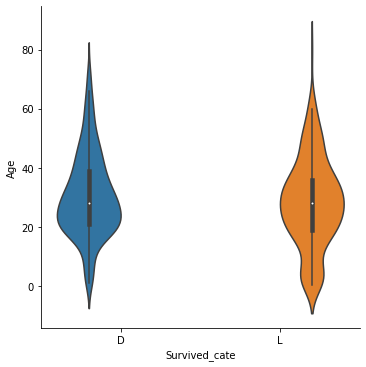

In [15]:
g = sns.catplot(x="Survived_cate", y="Age", hue="Survived_cate",
               data=df_train, kind="violin")

### Q2:透過數值法計算  Sex 和 Survived  是否有相關性?


In [ ]:
# 離散 vs 離散

In [19]:
# step1: 用交叉列連表(contingency table)，來整理兩個類別型的資料
contTable = pd.crosstab(df_train['Sex'], df_train['Survived_cate'])
contTable

Survived_cate,D,L
Sex,,
female,81,233
male,468,109


In [20]:
# Step2:計算資料自由度 df*
df = min(contTable.shape[0], contTable.shape[1]) - 1
df

1

In [21]:
crosstab, res = researchpy.crosstab(df_train['Sex'], df_train['Survived_cate'], test='chi-square')
#print(res)
print("Cramer's value is",res.loc[2,'results'])

#這邊用卡方檢定獨立性，所以採用的 test 參數為卡方 "test =" argument.
# 採用的變數在這個模組中，會自己根據資料集來判斷，Cramer's Phi if it a 2x2 table, or Cramer's V is larger than 2x2.

Cramer's value is 0.5434


In [22]:
## 寫一個副程式判斷相關性的強度
def judgment_CramerV(df,V):
    if df == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return(qual)

judgment_CramerV(df,res.loc[2,'results'])

'large'

In [ ]:
# 此案例的性別和存活這兩個變數，呈現高度相關

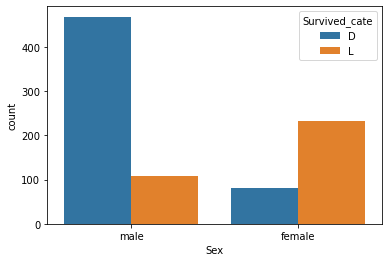

In [23]:
g= sns.countplot(x="Sex", hue="Survived_cate", data=df_train)

### Q3: 透過數值法計算  Age 和  Fare 是否有相關性?  

In [ ]:
# 連續 vs 連續
# Pearson相關係數 是描述兩個連續型變數的相關性
# 語法: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

In [29]:
#計算每一行是否有遺失值，計算遺失比例
missing_vals = data.isnull().sum()/len(df_train)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

missing_index=data.isnull()
display(data[missing_index.values==True])

        missing_rate
Sex         0.000000
Age         0.198653
Pclass      0.000000


,Sex,Age,Pclass
5,1,NaN,2
17,1,NaN,1
19,0,NaN,2
26,1,NaN,2
28,0,NaN,2
...,...,...,...
859,1,NaN,2
863,0,NaN,2
868,1,NaN,2
878,1,NaN,2


29.69911764705882
14.526497332334044


D:\Users\Meng-Hsin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


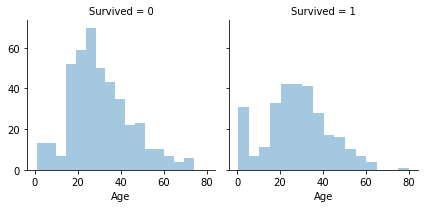

In [30]:
print(df_train['Age'].mean()) #age平均
print(df_train['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

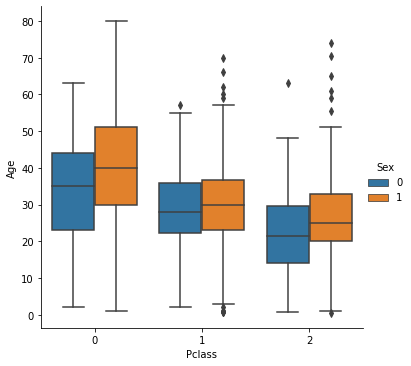

In [31]:
g = sns.catplot(x="Pclass", y="Age", hue="Sex",
               data=df_train,kind="box")
#男生女生的身高特性有差異
# 觀察到不同艙等的年紀不太相同

In [36]:
#ValueError: could not convert string to float: 'Male', sklearn 中的 KNN 只能處理數值型態
#轉型 
#透過 preprocessing 轉換
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.

le = preprocessing.LabelEncoder()
df_train['Pclass']=le.fit_transform(df_train['Pclass'])

df_train['Sex']=le.fit_transform(df_train['Sex'])

data=df_train[['Sex','Age','Pclass']]
# KNN
#設定用多少鄰居資訊來補值
value_neighbors=1
from sklearn.impute import KNNImputer
#進行 KNN的一些設定
imputer = KNNImputer(n_neighbors=value_neighbors)
#把資料放進去，進行補值
df_filled = pd.DataFrame(imputer.fit_transform(data))
#只呈現有遺失值的資料
display(data[missing_index.values==True])
#只呈現有遺失值的資料-呈現補值的結果
display(df_filled[missing_index.values==True])
display(df_filled)

df_train = 

,Sex,Age,Pclass
5,1,NaN,2
17,1,NaN,1
19,0,NaN,2
26,1,NaN,2
28,0,NaN,2
...,...,...,...
859,1,NaN,2
863,0,NaN,2
868,1,NaN,2
878,1,NaN,2


,0,1,2
5,1.0,22.0,2.0
17,1.0,35.0,1.0
19,0.0,26.0,2.0
26,1.0,22.0,2.0
28,0.0,26.0,2.0
...,...,...,...
859,1.0,22.0,2.0
863,0.0,26.0,2.0
868,1.0,22.0,2.0
878,1.0,22.0,2.0


,0,1,2
0,1.0,22.0,2.0
1,0.0,38.0,0.0
2,0.0,26.0,2.0
3,0.0,35.0,0.0
4,1.0,35.0,2.0
...,...,...,...
886,1.0,27.0,1.0
887,0.0,19.0,0.0
888,0.0,26.0,2.0
889,1.0,26.0,0.0


In [38]:
# 由於 pearsonr 有兩個回傳結果，我們只需取第一個回傳值為相關係數
corr, _=stats.pearsonr(df_filled[1], df_train['Fare'])
print(corr)
#代表年齡和票價有低度線性相關

0.13030507159341595


In [39]:
df_train['Age_filled'] = df_filled[1]
display(df_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_cate,Age_filled
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,D,22.0
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,L,38.0
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,L,26.0
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,L,35.0
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,D,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,D,27.0
887,888,1,0,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,L,19.0
888,889,0,2,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,D,26.0
889,890,1,0,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,L,26.0


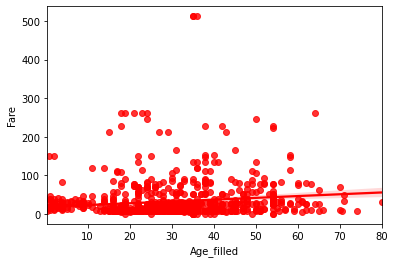

In [41]:
g = sns.regplot(x="Age_filled", y="Fare", color="r",data=df_train)
#年齡和票價較無關連

In [ ]:
# 作業解答：

In [ ]:
df_train['Survived_cate']=df_train['Survived']
df_train['Survived_cate']=df_train['Survived_cate'].astype('object')
print(df_train.info())

In [ ]:
display(df_train.head(5))

In [ ]:
## Age:連續型 Survived_cate 為離散型，所以採用 Eta Squared

In [ ]:
計算相關係數，不能允許有遺失值，所以必須先補值，或者把遺失值刪除

In [ ]:
## 取出資料後，把遺失值刪除
complete_data=df_train[['Age','Survived_cate']].dropna()
display(complete_data)

In [ ]:
aov = pg.anova(dv='Age', between='Survived_cate', data=complete_data, detailed=True)
aov

In [ ]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
etaSq

In [ ]:
def judgment_etaSq(etaSq):
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
    return(qual)
judgment_etaSq(etaSq)

In [ ]:
g = sns.catplot(x="Survived_cate", y="Age", hue="Survived_cate",
               data=complete_data, kind="violin")

In [ ]:
結論: 年紀和存活沒有相關性(complete_data)，思考是否需要放入模型，或者要深入觀察特性，是否需要做特徵轉換

In [ ]:
## Sex:離散型 Survived_cate 為離散型，所以採用 Cramér's V

In [ ]:
contTable = pd.crosstab(df_train['Sex'], df_train['Survived_cate'])
contTable

In [ ]:
df = min(contTable.shape[0], contTable.shape[1]) - 1
df

In [ ]:
crosstab, res = researchpy.crosstab(df_train['Survived_cate'], df_train['Sex'], test='chi-square')
#print(res)
print("Cramer's value is",res.loc[2,'results'])

#這邊用卡方檢定獨立性，所以採用的 test 參數為卡方 "test =" argument.
# 採用的變數在這個模組中，會自己根據資料集來判斷，Cramer's Phi if it a 2x2 table, or Cramer's V is larger than 2x2.

In [ ]:
## 寫一個副程式判斷相關性的強度
def judgment_CramerV(df,V):
    if df == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return(qual)

judgment_CramerV(df,res.loc[2,'results'])

In [ ]:
g= sns.countplot(x="Sex", hue="Survived_cate", data=df_train)

In [ ]:
數值型態和圖形， 存活和性別存在高度的相關性，要預測存活，一定要把性別加上去。

In [ ]:
## Age 連續 , Fare 連續，用 Pearson 相關係數

In [ ]:
## 取出資料後，把遺失值刪除
complete_data=df_train[['Age','Fare']].dropna()
display(complete_data)

In [ ]:
# 由於 pearsonr 有兩個回傳結果，我們只需取第一個回傳值為相關係數
corr, _=stats.pearsonr(complete_data['Age'],complete_data['Fare'])
print(corr)

In [ ]:
g = sns.regplot(x="Age", y="Fare", color="g",data=complete_data)

In [ ]:
年紀和票價沒有線性相關姓，圖形上也觀察到沒有相關性